# Revenue Prediction

### Business Understanding

The prediction of revenue in shrimp aquaculture is essential for assessing the financial performance of shrimp farming operations. Revenue estimation involves predicting the value of harvested shrimp based on various factors such as size, weight, and market conditions. Accurate revenue prediction enables aquaculture professionals to optimize pricing strategies, maximize profitability, and make informed decisions regarding sales and marketing efforts.

### Problem Statement

Given the Shrimp Aquaculture dataset, our objective is to develop a machine learning regression model capable of accurately predicting the revenue generated from shrimp harvests. The model will utilize features such as shrimp size, weight, and environmental parameters to make revenue predictions. The primary evaluation metric for the model will be the Mean Absolute Error (MAE), which measures the average absolute difference between predicted and actual revenue values.

### Business Objective

The primary business objective is to create a reliable predictive model for estimating the revenue generated from shrimp harvests in aquaculture ponds. This model will enable stakeholders to:

1. Optimize pricing strategies and market positioning to maximize revenue.
2. Forecast revenue streams and plan financial budgets effectively.
3. Enhance decision-making regarding sales and marketing activities based on accurate revenue predictions.

### Business Metrics

To assess the effectiveness of our predictive model and its impact on business objectives, we will focus on the following metrics:

1. **Prediction Accuracy**: The degree to which the predicted revenue values align with actual revenue measurements, ensuring reliable estimates for financial planning and decision-making.
2. **Profitability Enhancement**: The improvements in farm profitability resulting from optimized pricing strategies and revenue forecasting guided by the model predictions.
3. **Market Competitiveness**: The ability of the model to provide insights into market trends and competitor pricing strategies, enabling stakeholders to maintain competitiveness in the shrimp farming industry.

### Machine Learning Metrics

For evaluating and refining our machine learning model, we will primarily rely on the following metric:

1. **Mean Absolute Error (MAE)**: The primary evaluation metric, MAE measures the average absolute difference between predicted and actual revenue values. A lower MAE indicates higher prediction accuracy and model performance.curacy and model performance.


In [1]:
# Import libraries for data preparation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Import libraries for saving and loading model and column files
import pickle
import copy

# Import train_test_split for splitting data
from sklearn.model_selection import train_test_split

In [2]:
# Read Data
df = pd.read_csv('Data/2_processed_data/df_selling_price_prediction_data.csv')

In [3]:
# Sanity Check
df

total_seed     area  initial_age  limit_weight_per_area  \
0         331920  4030.00          0.0                   2.00   
1         357570  2000.00          0.0                   1.25   
2         188000  1225.00          0.0                   1.25   
3         200128   803.84          0.0                   1.25   
4         148007  1254.00          0.0                   1.25   
...          ...      ...          ...                    ...   
1364      122400   500.00          0.0                   1.25   
1365      221000   314.00          0.0                   4.77   
1366      226284  1400.00          0.0                   1.25   
1367      100000   900.00          0.0                   1.25   
1368      384000  2915.00          0.0                   1.25   

      target_cultivation_day  target_size  pond_length  pond_width  \
0                      110.0         35.0        65.00       62.00   
1                      120.0         20.0        50.00       40.00   
2                      100.0         55.0        35.00       35.00   
3                      120.0         55.0        32.00       32.00   
4                      153.0         55.0        34.64       34.65   
...                      ...          ...          ...         ...   
1364                   100.0         30.0        25.00       20.00   
1365                   110.0         50.0        20.00       20.00   
1366                   120.0         55.0        40.00       35.00   
1367                   120.0         55.0        45.00       20.00   
1368                   100.0         40.0        55.00       53.00   

      pond_depth    size  ...   nitrite  alkalinity    hardness     calcium  \
0            1.0   83.00  ...  0.000000    0.000000    0.000000    0.000000   
1            1.4   72.48  ...  0.008200   17.044444  680.555556  119.855556   
2            1.2   93.00  ...  0.044667    9.813333  176.000000   29.333333   
3            1.5   89.24  ...  0.000000    0.000000    0.000000    0.000000   
4            1.3   60.00  ...  0.000000    0.000000    0.000000    0.000000   
...          ...     ...  ...       ...         ...         ...         ...   
1364         1.5  125.00  ...  0.005179    3.357143    0.000000    2.857143   
1365         1.2  127.00  ...  0.026263   16.323232   73.606061   29.939394   
1366         1.2   87.00  ...  0.000000   13.072165    0.000000    0.000000   
1367         1.5  120.00  ...  0.004145   22.309091  771.454545   95.890909   
1368         1.7  105.00  ...  0.000000   24.000000    0.000000    0.000000   

       magnesium  carbonate  bicarbonate  transparency  total_plankton_  \
0       0.000000   0.000000     0.000000     45.327103         0.000000   
1     575.700000   0.000000    15.777778     68.916667    212305.555556   
2     146.666667   0.160000     9.733333      0.000000     22466.666667   
3       0.000000   0.000000     0.000000     41.421569         0.000000   
4       0.000000   0.000000     0.000000     30.845833         0.000000   
...          ...        ...          ...           ...              ...   
1364    1.785714   0.500000     2.857143      0.000000     16250.000000   
1365   80.262626   0.909091     0.404040     33.838384      4909.595960   
1366    0.000000   0.000000     6.845361     58.314433     44536.082474   
1367  300.436364   0.436364    16.418182      0.000000     49785.490909   
1368    0.000000   0.857143     6.571429      0.000000    107857.142857   

      selling_price  
0      4.984335e+07  
1      2.740664e+07  
2      7.464000e+06  
3      2.692924e+07  
4      4.912083e+07  
...             ...  
1364   1.183333e+04  
1365   3.153902e+06  
1366   1.899866e+07  
1367   1.345713e+07  
1368   4.443972e+07  

[1369 rows x 36 columns]

In [4]:
# Check Null Values
df.isnull().sum()

total_seed                0
area                      0
initial_age               0
limit_weight_per_area     0
target_cultivation_day    0
target_size               0
pond_length               0
pond_width                0
pond_depth                0
size                      0
weight                    0
total_harvested           0
survival_rate             0
cycle_duration_days       0
average_daily_gain        0
average_body_weight       0
feed_quantity_kg          0
feed_conversion_ratio     0
morning_temperature       0
evening_temperature       0
morning_do                0
evening_do                0
morning_salinity          0
evening_salinity          0
ammonia                   0
nitrate                   0
nitrite                   0
alkalinity                0
hardness                  0
calcium                   0
magnesium                 0
carbonate                 0
bicarbonate               0
transparency              0
total_plankton_           0
selling_price       

In [5]:
# Check Duplicated Value
df.duplicated().sum()

0

In [6]:
# Check Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_seed              1369 non-null   int64  
 1   area                    1369 non-null   float64
 2   initial_age             1369 non-null   float64
 3   limit_weight_per_area   1369 non-null   float64
 4   target_cultivation_day  1369 non-null   float64
 5   target_size             1369 non-null   float64
 6   pond_length             1369 non-null   float64
 7   pond_width              1369 non-null   float64
 8   pond_depth              1369 non-null   float64
 9   size                    1369 non-null   float64
 10  weight                  1369 non-null   float64
 11  total_harvested         1369 non-null   float64
 12  survival_rate           1369 non-null   float64
 13  cycle_duration_days     1369 non-null   int64  
 14  average_daily_gain      1369 non-null   

## Data Definition

# Revenue Prediction in Shrimp Aquaculture

### Brief Narrative about the Shrimp Aquaculture Revenue Dataset:

The Shrimp Aquaculture Revenue dataset is a valuable resource used for regression tasks, specifically aimed at predicting the revenue generated from shrimp cultivation in aquaculture ponds. This dataset encompasses various attributes related to shrimp farming practices, pond conditions, water quality parameters, and environmental factors crucial for shrimp growth and development. The primary objective of leveraging this dataset is to develop predictive models capable of accurately estimating the revenue generated from shrimp sales, which is essential for assessing farm profitability, optimizing production strategies, and maximizing economic returns in shrimp aquaculture operations.

The dataset comprises 1369 entries and 36 columns, including attributes such as shrimp size, weight, total harvested quantity, cultivation cycle duration, survival rate, water temperature, dissolved oxygen levels, salinity, nutrient concentrations, and the target variable, `selling_price`, representing the selling price of harvested shrimp. This dataset serves as a vital tool for researchers, aquaculture professionals, and shrimp farmers to enhance revenue generation, improve farm management practices, and make informed decisions to ensure the financial sustainability of shrimp aquaculture ventures.

### Data Definitions:

1. **total_seed**: Total number of shrimp seeds stocked in the pond. Data type: `int64`.
2. **area**: Area of the pond in square meters. Data type: `float64`.
3. **initial_age**: Initial age of the shrimp seeds in days. Data type: `float64`.
4. **limit_weight_per_area**: Limit weight of shrimp per unit area in kg/m². Data type: `float64`.
5. **target_cultivation_day**: Target number of cultivation days. Data type: `float64`.
6. **target_size**: Target size of shrimp at harvest in grams. Data type: `float64`.
7. **pond_length**: Length of the pond in meters. Data type: `float64`.
8. **pond_width**: Width of the pond in meters. Data type: `float64`.
9. **pond_depth**: Depth of the pond in meters. Data type: `float64`.
10. **size**: Average size of shrimp at stocking in grams. Data type: `float64`.
11. **weight**: Average weight of shrimp at stocking in grams. Data type: `float64`.
12. **total_harvested**: Total number of shrimp harvested. Data type: `float64`.
13. **survival_rate**: Survival rate of shrimp in percentage. Data type: `float64`.
14. **cycle_duration_days**: Duration of the cultivation cycle in days. Data type: `int64`.
15. **average_daily_gain**: Average daily weight gain of shrimp in grams. Data type: `float64`.
16. **average_body_weight**: Average body weight of shrimp at harvest in grams. Data type: `float64`.
17. **feed_quantity_kg**: Total feed quantity used during the cycle in kilograms. Data type: `float64`.
18. **feed_conversion_ratio**: Feed conversion ratio, a measure of the efficiency of feed usage. Data type: `float64`.
19. **morning_temperature**: Morning water temperature in degrees Celsius. Data type: `float64`.
20. **evening_temperature**: Evening water temperature in degrees Celsius. Data type: `float64`.
21. **morning_do**: Morning dissolved oxygen level in mg/L. Data type: `float64`.
22. **evening_do**: Evening dissolved oxygen level in mg/L. Data type: `float64`.
23. **morning_salinity**: Morning water salinity in ppt (parts per thousand). Data type: `float64`.
24. **evening_salinity**: Evening water salinity in ppt (parts per thousand). Data type: `float64`.
25. **ammonia**: Ammonia concentration in the water in mg/L. Data type: `float64`.
26. **nitrate**: Nitrate concentration in the water in mg/L. Data type: `float64`.
27. **nitrite**: Nitrite concentration in the water in mg/L. Data type: `float64`.
28. **alkalinity**: Water alkalinity in mg/L CaCO3. Data type: `float64`.
29. **hardness**: Water hardness in mg/L CaCO3. Data type: `float64`.
30. **calcium**: Calcium concentration in the water in mg/L. Data type: `float64`.
31. **magnesium**: Magnesium concentration in the water in mg/L. Data type: `float64`.
32. **carbonate**: Carbonate concentration in the water in mg/L. Data type: `float64`.
33. **bicarbonate**: Bicarbonate concentration in the water in mg/L. Data type: `float64`.
34. **transparency**: Water transparency in centimeters. Data type: `float64`.
35. **total_plankton_**: Total plankton concentration in cells/mL. Data type: `float64`.
36. **selling_price**: Selling price of harvested shrimp (target variable). Data type: `float64`.

This dataset provides valuable insights into the factors influencing revenue generation in shrimp aquaculture, facilitating the development of predictive models for revenue optimization and financi
22. **evening_do**: Tingkat oksigen terlarut di sore hari dalam mg/L. Memastikan oksigen terility of shrimp farming ventures. of factors that affect shrimp survival rates.

In [7]:
# Iterate through each column in the DataFrame
for column in df.columns:
    # Print the column name along with its minimum and maximum values
    print(f"{column}: min = {df[column].min()}, max = {df[column].max()}")

total_seed: min = 1272, max = 1600000
area: min = 1.02, max = 249998.0
initial_age: min = 0.0, max = 58.0
limit_weight_per_area: min = 0.6, max = 270.0
target_cultivation_day: min = 0.0, max = 348.0
target_size: min = 0.0, max = 120.0
pond_length: min = 3.0, max = 577.35
pond_width: min = 1.5, max = 433.01
pond_depth: min = 0.7, max = 300.0
size: min = 10.0, max = 1000.0
weight: min = 0.0, max = 11000.0
total_harvested: min = 0.0, max = 496000.0
survival_rate: min = 0.0, max = 99.46474713916574
cycle_duration_days: min = 32, max = 348
average_daily_gain: min = -0.2250000000000001, max = 2.066666666666667
average_body_weight: min = 0.8, max = 85.0
feed_quantity_kg: min = 14.6, max = 155455.0
feed_conversion_ratio: min = 0.54, max = inf
morning_temperature: min = 0.0, max = 543.305396226415
evening_temperature: min = 0.0, max = 75.968125
morning_do: min = -0.0665376344086021, max = 605.935925
evening_do: min = 0.0, max = 71.40357
morning_salinity: min = 0.0, max = 181.059320754717
evenin

In [8]:
# Viewing descriptive statistics using describe()
df.describe()

total_seed           area  initial_age  limit_weight_per_area  \
count  1.369000e+03    1369.000000  1369.000000            1369.000000   
mean   2.096658e+05    1713.640804     0.398101               1.795303   
std    1.535426e+05    7041.453598     3.223411               9.153851   
min    1.272000e+03       1.020000     0.000000               0.600000   
25%    1.000000e+05     803.840000     0.000000               1.250000   
50%    1.800000e+05    1225.000000     0.000000               1.250000   
75%    3.000000e+05    2000.000000     0.000000               1.250000   
max    1.600000e+06  249998.000000    58.000000             270.000000   

       target_cultivation_day  target_size  pond_length   pond_width  \
count             1369.000000  1369.000000  1369.000000  1369.000000   
mean               113.315559    51.135866    41.206187    33.669043   
std                 16.110948    11.222782    22.568651    16.307893   
min                  0.000000     0.000000     3.000000     1.500000   
25%                100.000000    45.000000    31.000000    27.000000   
50%                120.000000    55.000000    40.000000    32.500000   
75%                120.000000    55.000000    50.000000    40.000000   
max                348.000000   120.000000   577.350000   433.010000   

        pond_depth         size  ...      nitrite   alkalinity     hardness  \
count  1369.000000  1369.000000  ...  1369.000000  1369.000000  1369.000000   
mean      4.169175   117.615201  ...     1.394825    11.572112   224.266076   
std      20.408010    61.030694  ...    20.256401    22.073575   517.221538   
min       0.700000    10.000000  ...     0.000000     0.000000     0.000000   
25%       1.000000    80.000000  ...     0.000000     0.000000     0.000000   
50%       1.200000   105.000000  ...     0.000000     3.304348     0.000000   
75%       1.500000   140.000000  ...     0.009487    17.587302   271.641791   
max     300.000000  1000.000000  ...   527.815758   388.233208  5918.714286   

           calcium    magnesium    carbonate  bicarbonate  transparency  \
count  1369.000000  1369.000000  1369.000000  1369.000000   1369.000000   
mean     33.153510   107.181979     0.642249     7.890761     19.771421   
std      91.712535   273.394738     3.139111    18.257385     21.856171   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000     0.000000     0.000000      0.000000   
50%       0.000000     0.000000     0.000000     0.000000      8.000000   
75%      48.010753   138.080357     0.266667    12.575000     40.060484   
max    1877.777778  4533.333333    40.568966   373.981132     80.000000   

       total_plankton_  selling_price  
count     1.369000e+03   1.369000e+03  
mean      5.174267e+04   3.349348e+07  
std       1.631905e+05   7.349989e+07  
min       0.000000e+00   5.000000e+00  
25%       0.000000e+00   6.542208e+06  
50%       0.000000e+00   1.578135e+07  
75%       4.059364e+04   3.183706e+07  
max       3.818013e+06   1.364000e+09  

[8 rows x 36 columns]

## Data Splitting

In [9]:
# Separating the feature variables (X) and the target variable (y)
X = df.drop(columns=['selling_price','feed_conversion_ratio'])
y = df['selling_price']

In [10]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=123)

In [11]:
# Sanity Check
X_train

total_seed     area  initial_age  limit_weight_per_area  \
130        71008   827.08          0.0                   1.25   
911       372000  2400.00          1.0                   2.00   
858       200126   803.84          0.0                   1.25   
297       326192   706.50          0.0                   2.50   
1101       84192  1000.00          0.0                   1.25   
...          ...      ...          ...                    ...   
1147       50000   256.00          0.0                   2.25   
106       235000  1300.00          1.0                   1.25   
1041      115000  1000.00          0.0                   1.20   
1122      320000  1450.00          0.0                   2.50   
1346       71008   812.00          0.0                   1.25   

      target_cultivation_day  target_size  pond_length  pond_width  \
130                    100.0         55.0        31.00       26.68   
911                    140.0         45.0        60.00       40.00   
858                    120.0         55.0        32.00       32.00   
297                     95.0         50.0        32.00       32.00   
1101                   100.0         55.0        40.00       40.00   
...                      ...          ...          ...         ...   
1147                    99.0         45.0        16.00       16.00   
106                    100.0         55.0        41.63       31.22   
1041                   110.0         30.0        37.67       28.25   
1122                   120.0         45.0        50.00       29.00   
1346                   100.0         55.0        29.00       28.00   

      pond_depth    size  ...   nitrate   nitrite  alkalinity    hardness  \
130          1.0  107.00  ...  0.000000  0.000000    0.000000    0.000000   
911          1.3   66.00  ...  0.000000  0.000000    0.000000    0.000000   
858          1.5  101.04  ...  0.000000  0.000000    0.000000    0.000000   
297          1.3  174.00  ...  3.783784  0.000000   11.972973  654.729730   
1101         1.0   92.60  ...  0.188679  0.003019  388.233208   78.339623   
...          ...     ...  ...       ...       ...         ...         ...   
1147         1.2  180.00  ...  0.000000  0.000000    0.000000    0.000000   
106          1.4  116.00  ...  0.000125  1.329732   12.946429  377.660714   
1041         1.1  110.00  ...  0.000000  0.013000   25.129630  932.907407   
1122         1.2  133.00  ...  0.000000  0.002574   17.276596  244.276596   
1346         2.1  115.00  ...  0.000000  0.000000    0.000000    0.000000   

        calcium   magnesium  carbonate  bicarbonate  transparency  \
130    0.000000    0.000000   0.000000     0.000000     49.101449   
911    0.000000    0.000000   0.000000     0.000000      0.000000   
858    0.000000    0.000000   0.000000     0.000000     42.352941   
297   43.243243  160.594595   0.000000    11.972973     35.945946   
1101  27.830189   80.415094   0.000000   373.981132     24.330189   
...         ...         ...        ...          ...           ...   
1147   0.000000    0.000000   0.000000     0.000000     35.196078   
106   84.232143  293.410714   1.732143    10.660714     52.321429   
1041  13.555556   42.018519   1.333333     3.111111     50.092593   
1122  43.680851  163.574468   1.702128    15.553191     35.063830   
1346   0.000000    0.000000   0.000000     0.000000     46.609589   

      total_plankton_  
130          0.000000  
911          0.000000  
858          0.000000  
297     405810.825676  
1101      8301.886792  
...               ...  
1147         0.000000  
106       4285.714286  
1041       740.740741  
1122     23872.340426  
1346         0.000000  

[1095 rows x 34 columns]

In [12]:
# Sanity Check
X_test

total_seed    area  initial_age  limit_weight_per_area  \
568       408825  2020.0          1.0                   2.00   
18        400000  2025.0          0.0                   1.25   
252       120000  1000.0          0.0                   1.25   
733       369096  2330.0          0.0                   1.25   
308       203000  1600.0          1.0                   1.25   
...          ...     ...          ...                    ...   
1362      380000  1056.0          0.0                   1.25   
145        80000   490.0          0.0                   1.50   
136       436424  1962.5          0.0                   1.25   
971       150000  1200.0          0.0                   1.25   
178       133000  1680.0          0.0                   1.25   

      target_cultivation_day  target_size  pond_length  pond_width  \
568                    135.0         45.0        40.00       50.50   
18                     120.0         55.0        45.00       45.00   
252                    120.0         55.0        50.00       20.00   
733                    120.0         55.0        50.00       46.60   
308                    120.0         55.0        40.00       40.00   
...                      ...          ...          ...         ...   
1362                   120.0         55.0        33.00       32.00   
145                    110.0         35.0        25.56       19.17   
136                    120.0         50.0        50.00       50.00   
971                    100.0         55.0        34.64       34.64   
178                    120.0         45.0        36.20       46.40   

      pond_depth   size  ...   nitrate    nitrite  alkalinity    hardness  \
568          1.3   95.0  ...  0.000000   0.004660   21.433962    0.000000   
18           1.5  115.0  ...  0.000000   0.000000    0.000000    0.000000   
252          1.0  179.0  ...  0.000000   0.001000    3.040000   66.000000   
733          1.2   81.0  ...  0.000000   0.000000    0.000000    0.000000   
308          1.0   63.0  ...  2.631579   0.013158    0.000000    0.000000   
...          ...    ...  ...       ...        ...         ...         ...   
1362         1.8  108.0  ...  0.000000  49.045185    9.347826  405.434783   
145          1.0  230.0  ...  0.000000   0.000000    0.000000    0.000000   
136          1.2   78.0  ...  0.000000   0.000610   21.768293    0.000000   
971          1.7   41.0  ...  0.000000   0.014970    6.878788  222.727273   
178          1.1   57.0  ...  1.442308   0.042875   12.000000  119.759615   

        calcium   magnesium  carbonate  bicarbonate  transparency  \
568    0.000000    0.000000   2.792453    18.641509     44.858491   
18     0.000000    0.000000   0.000000     0.000000     15.000000   
252   10.000000   56.000000   0.320000     2.720000      0.000000   
733    0.000000    0.000000   0.000000     0.000000      7.465909   
308    0.000000    0.000000   0.000000     0.000000      9.631579   
...         ...         ...        ...          ...           ...   
1362  29.130435   80.826087   0.000000     9.347826     39.304348   
145    0.000000    0.000000   0.000000     0.000000      0.000000   
136   67.670732  131.341463   0.000000     0.000000      9.000000   
971   33.333333  189.393939   0.545455     6.333333      0.000000   
178   74.615385  179.173077   0.557692    11.394231     45.120192   

      total_plankton_  
568       9644.339623  
18           0.000000  
252          0.000000  
733          0.000000  
308          0.000000  
...               ...  
1362      6222.826087  
145          0.000000  
136          0.000000  
971      36704.545455  
178      45533.653846  

[274 rows x 34 columns]

In [13]:
# Sanity Check
y_train

130     6.557875e+06
911     6.570479e+07
858     2.006287e+07
297     1.191672e+07
1101    1.158356e+07
            ...     
1147    4.100000e+06
106     7.389201e+06
1041    7.940310e+06
1122    3.183706e+07
1346    5.962150e+06
Name: selling_price, Length: 1095, dtype: float64

In [14]:
# Sanity Check
y_test

568     1.038680e+08
18      1.600837e+07
252     2.443403e+06
733     1.093453e+04
308     6.127285e+07
            ...     
1362    4.029282e+07
145     6.611250e+06
136     8.659065e+07
971     4.270350e+07
178     3.290087e+07
Name: selling_price, Length: 274, dtype: float64

In [15]:
# create x_train_copy
X_train_copy = X_train.copy()

In [16]:
# create x_test_copy
X_test_copy = X_test.copy()

## Simple EDA

In [17]:
# Combine X_train and y_train for EDA purposes
train_set = pd.merge(X_train, y_train, left_index=True, right_index=True)

# Sanity check the data
train_set

total_seed     area  initial_age  limit_weight_per_area  \
130        71008   827.08          0.0                   1.25   
911       372000  2400.00          1.0                   2.00   
858       200126   803.84          0.0                   1.25   
297       326192   706.50          0.0                   2.50   
1101       84192  1000.00          0.0                   1.25   
...          ...      ...          ...                    ...   
1147       50000   256.00          0.0                   2.25   
106       235000  1300.00          1.0                   1.25   
1041      115000  1000.00          0.0                   1.20   
1122      320000  1450.00          0.0                   2.50   
1346       71008   812.00          0.0                   1.25   

      target_cultivation_day  target_size  pond_length  pond_width  \
130                    100.0         55.0        31.00       26.68   
911                    140.0         45.0        60.00       40.00   
858                    120.0         55.0        32.00       32.00   
297                     95.0         50.0        32.00       32.00   
1101                   100.0         55.0        40.00       40.00   
...                      ...          ...          ...         ...   
1147                    99.0         45.0        16.00       16.00   
106                    100.0         55.0        41.63       31.22   
1041                   110.0         30.0        37.67       28.25   
1122                   120.0         45.0        50.00       29.00   
1346                   100.0         55.0        29.00       28.00   

      pond_depth    size  ...   nitrite  alkalinity    hardness    calcium  \
130          1.0  107.00  ...  0.000000    0.000000    0.000000   0.000000   
911          1.3   66.00  ...  0.000000    0.000000    0.000000   0.000000   
858          1.5  101.04  ...  0.000000    0.000000    0.000000   0.000000   
297          1.3  174.00  ...  0.000000   11.972973  654.729730  43.243243   
1101         1.0   92.60  ...  0.003019  388.233208   78.339623  27.830189   
...          ...     ...  ...       ...         ...         ...        ...   
1147         1.2  180.00  ...  0.000000    0.000000    0.000000   0.000000   
106          1.4  116.00  ...  1.329732   12.946429  377.660714  84.232143   
1041         1.1  110.00  ...  0.013000   25.129630  932.907407  13.555556   
1122         1.2  133.00  ...  0.002574   17.276596  244.276596  43.680851   
1346         2.1  115.00  ...  0.000000    0.000000    0.000000   0.000000   

       magnesium  carbonate  bicarbonate  transparency  total_plankton_  \
130     0.000000   0.000000     0.000000     49.101449         0.000000   
911     0.000000   0.000000     0.000000      0.000000         0.000000   
858     0.000000   0.000000     0.000000     42.352941         0.000000   
297   160.594595   0.000000    11.972973     35.945946    405810.825676   
1101   80.415094   0.000000   373.981132     24.330189      8301.886792   
...          ...        ...          ...           ...              ...   
1147    0.000000   0.000000     0.000000     35.196078         0.000000   
106   293.410714   1.732143    10.660714     52.321429      4285.714286   
1041   42.018519   1.333333     3.111111     50.092593       740.740741   
1122  163.574468   1.702128    15.553191     35.063830     23872.340426   
1346    0.000000   0.000000     0.000000     46.609589         0.000000   

      selling_price  
130    6.557875e+06  
911    6.570479e+07  
858    2.006287e+07  
297    1.191672e+07  
1101   1.158356e+07  
...             ...  
1147   4.100000e+06  
106    7.389201e+06  
1041   7.940310e+06  
1122   3.183706e+07  
1346   5.962150e+06  

[1095 rows x 35 columns]

C:\Users\hp\AppData\Local\Temp\ipykernel_16084\2196530832.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_set[col], shade=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_16084\2196530832.py:30: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_val = stats.mode(train_set[col])[0]
C:\Users\hp\AppData\Local\Temp\ipykernel_16084\2196530832.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update you

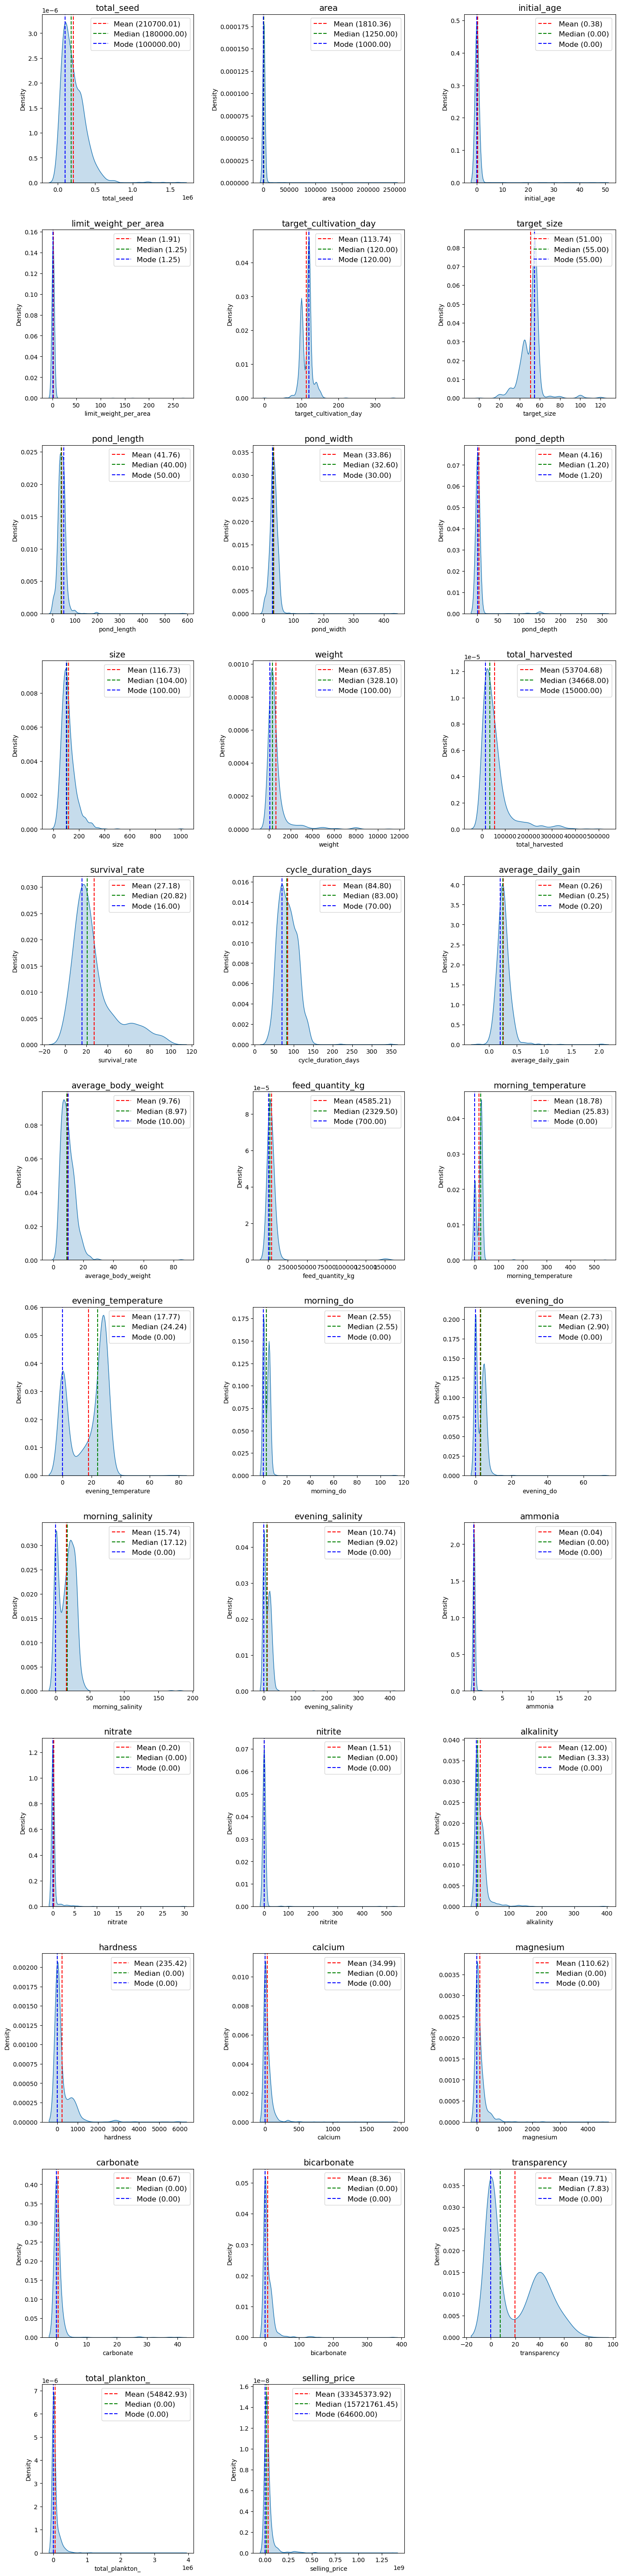

In [18]:
# Setting the number of rows and columns for subplots
num_rows = 12 
num_cols = 3 

# Calculating the total number of subplots
total_subplots = num_rows * num_cols

# Adjusting aspect ratio based on number of rows and columns
fig_width = 15 
fig_height = 5 * num_rows  

# Adjusting the figure size with aspect ratio
plt.figure(figsize=(fig_width, fig_height))

# Initializing the subplot index
subplot_index = 1

# Looping through each column to visualize the data distribution
for col in train_set.columns:
    if train_set[col].dtype != 'object':
        # Creating a subplot
        plt.subplot(num_rows, num_cols, subplot_index)

        # Using kdeplot to visualize the distribution
        ax = sns.kdeplot(train_set[col], shade=True)

        # Calculating mean, median, and mode
        mean_val = train_set[col].mean()
        median_val = train_set[col].median()
        mode_val = stats.mode(train_set[col])[0]

        # Adding lines for mean, median, and mode
        ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean ({mean_val:.2f})')
        ax.axvline(median_val, color='green', linestyle='--', label=f'Median ({median_val:.2f})')
        ax.axvline(mode_val, color='blue', linestyle='--', label=f'Mode ({mode_val[0]:.2f})')

        # Setting the title
        ax.set_title(col, fontsize=14)

        # Adding a legend
        plt.legend(fontsize=12)

        # Incrementing the subplot index
        subplot_index += 1

        # Stop creating subplots if already reached the total number of subplots
        if subplot_index > total_subplots:
            break

# Adjusting the layout of subplots for better readability
plt.tight_layout(pad=3.0)

# Showing the plot
plt.show()


In [19]:
train_set.columns

Index(['total_seed', 'area', 'initial_age', 'limit_weight_per_area',
       'target_cultivation_day', 'target_size', 'pond_length', 'pond_width',
       'pond_depth', 'size', 'weight', 'total_harvested', 'survival_rate',
       'cycle_duration_days', 'average_daily_gain', 'average_body_weight',
       'feed_quantity_kg', 'morning_temperature', 'evening_temperature',
       'morning_do', 'evening_do', 'morning_salinity', 'evening_salinity',
       'ammonia', 'nitrate', 'nitrite', 'alkalinity', 'hardness', 'calcium',
       'magnesium', 'carbonate', 'bicarbonate', 'transparency',
       'total_plankton_', 'selling_price'],
      dtype='object')

In [20]:
# List of provided features
features = [
       'total_seed', 'area', 'initial_age', 'limit_weight_per_area',
       'target_cultivation_day', 'target_size', 'pond_length', 'pond_width',
       'pond_depth', 'size', 'weight', 'total_harvested', 'survival_rate',
       'cycle_duration_days', 'average_daily_gain', 'average_body_weight',
       'feed_quantity_kg', 'morning_temperature', 'evening_temperature',
       'morning_do', 'evening_do', 'morning_salinity', 'evening_salinity',
       'ammonia', 'nitrate', 'nitrite', 'alkalinity', 'hardness', 'calcium',
       'magnesium', 'carbonate', 'bicarbonate', 'transparency',
       'total_plankton_', 'selling_price'
]

# Calculate the correlation matrix using the Spearman method
correlation_matrix = train_set[features].corr(method='spearman')

# Flatten the correlation matrix and convert it to a DataFrame
correlation_df = correlation_matrix.unstack().reset_index()

# Rename columns
correlation_df.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Remove duplicate pairs and self-correlations
correlation_df = correlation_df[correlation_df['Feature 1'] != correlation_df['Feature 2']]

# Remove duplicates (reverse correlations) by keeping one side of the pair
correlation_df['abs_correlation'] = correlation_df['Correlation'].abs()
correlation_df = correlation_df.drop_duplicates(subset=['Feature 1', 'abs_correlation'])

# Sort the DataFrame by correlation values in descending order
correlation_df_sorted = correlation_df.sort_values(by='Correlation', ascending=False)

# Display the sorted correlation DataFrame
print(correlation_df_sorted[['Feature 1', 'Feature 2', 'Correlation']])

                Feature 1            Feature 2  Correlation
1043            magnesium              calcium     0.987526
1009              calcium            magnesium     0.987526
361                weight      total_harvested     0.907242
395       total_harvested               weight     0.907242
719            evening_do           morning_do     0.886636
...                   ...                  ...          ...
569      feed_quantity_kg                 size    -0.433574
499    average_daily_gain                 size    -0.512059
329                  size   average_daily_gain    -0.512059
534   average_body_weight                 size    -0.626714
330                  size  average_body_weight    -0.626714

[1190 rows x 3 columns]


In [21]:
# Sanity Check
correlation_df_sorted

Feature 1            Feature 2  Correlation  abs_correlation
1043            magnesium              calcium     0.987526         0.987526
1009              calcium            magnesium     0.987526         0.987526
361                weight      total_harvested     0.907242         0.907242
395       total_harvested               weight     0.907242         0.907242
719            evening_do           morning_do     0.886636         0.886636
...                   ...                  ...          ...              ...
569      feed_quantity_kg                 size    -0.433574         0.433574
499    average_daily_gain                 size    -0.512059         0.512059
329                  size   average_daily_gain    -0.512059         0.512059
534   average_body_weight                 size    -0.626714         0.626714
330                  size  average_body_weight    -0.626714         0.626714

[1190 rows x 4 columns]

In [22]:
# Filter the correlation dataframe for rows where 'Feature 1' or 'Feature 2' is 'survival_rate'
survival_rate_correlations = correlation_df_sorted[(correlation_df_sorted['Feature 1'] == 'selling_price') | (correlation_df_sorted['Feature 2'] == 'selling_price')]

# Display the filtered dataframe
survival_rate_correlations.head(30)

Feature 1               Feature 2  Correlation  \
1206           selling_price        feed_quantity_kg     0.576043   
594         feed_quantity_kg           selling_price     0.576043   
384                   weight           selling_price     0.559497   
1200           selling_price                  weight     0.559497   
1190           selling_price              total_seed     0.435415   
34                total_seed           selling_price     0.435415   
1201           selling_price         total_harvested     0.434397   
419          total_harvested           selling_price     0.434397   
1205           selling_price     average_body_weight     0.399983   
559      average_body_weight           selling_price     0.399983   
279               pond_width           selling_price     0.346307   
1197           selling_price              pond_width     0.346307   
1191           selling_price                    area     0.327482   
69                      area           selling_price     0.327482   
1198           selling_price              pond_depth     0.319954   
314               pond_depth           selling_price     0.319954   
524       average_daily_gain           selling_price     0.314304   
1204           selling_price      average_daily_gain     0.314304   
1203           selling_price     cycle_duration_days     0.294623   
489      cycle_duration_days           selling_price     0.294623   
244              pond_length           selling_price     0.263323   
1196           selling_price             pond_length     0.263323   
174   target_cultivation_day           selling_price     0.133188   
1194           selling_price  target_cultivation_day     0.133188   
454            survival_rate           selling_price     0.121611   
1202           selling_price           survival_rate     0.121611   
944               alkalinity           selling_price     0.121371   
1216           selling_price              alkalinity     0.121371   
909                  nitrite           selling_price     0.116996   
1215           selling_price                 nitrite     0.116996   

      abs_correlation  
1206         0.576043  
594          0.576043  
384          0.559497  
1200         0.559497  
1190         0.435415  
34           0.435415  
1201         0.434397  
419          0.434397  
1205         0.399983  
559          0.399983  
279          0.346307  
1197         0.346307  
1191         0.327482  
69           0.327482  
1198         0.319954  
314          0.319954  
524          0.314304  
1204         0.314304  
1203         0.294623  
489          0.294623  
244          0.263323  
1196         0.263323  
174          0.133188  
1194         0.133188  
454          0.121611  
1202         0.121611  
944          0.121371  
1216         0.121371  
909          0.116996  
1215         0.116996

## Data Preprocessing

In [23]:
# Import necessary libraries
import os
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [24]:
import os
import pickle
from sklearn.preprocessing import RobustScaler

# Columns to scale
columns_to_scale = [
       'total_seed', 'area', 'initial_age', 'limit_weight_per_area',
       'target_cultivation_day', 'target_size', 'pond_length', 'pond_width',
       'pond_depth', 'size', 'weight', 'total_harvested', 'survival_rate',
       'cycle_duration_days', 'average_daily_gain', 'average_body_weight',
       'feed_quantity_kg', 'morning_temperature', 'evening_temperature',
       'morning_do', 'evening_do', 'morning_salinity', 'evening_salinity',
       'ammonia', 'nitrate', 'nitrite', 'alkalinity', 'hardness', 'calcium',
       'magnesium', 'carbonate', 'bicarbonate', 'transparency',
       'total_plankton_'
]

def fit_scaler(train_data):
    """
    Fit a RobustScaler to the training data.

    Parameters:
    train_data (DataFrame): The training data.

    Returns:
    scaler (RobustScaler): The fitted scaler object.
    """
    scaler = RobustScaler()
    scaler.fit(train_data.loc[:, columns_to_scale])
    # Save scaler
    with open('model/selling_price_scaler_first.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    return scaler

def load_scaler(folder_path):
    """
    Load a saved scaler object from a folder.

    Parameters:
    folder_path (str): The path to the folder containing the saved scaler.

    Returns:
    scaler (RobustScaler): The loaded scaler object.
    """
    # Load scaler
    file_path = os.path.join(folder_path, 'selling_price_scaler_first.pkl')
    with open(file_path, 'rb') as f:
        scaler = pickle.load(f)
    return scaler

def transform_data(data, scaler):
    """
    Scale the data using a given scaler.

    Parameters:
    data (DataFrame): The data to be scaled.
    scaler (RobustScaler): The scaler object to use for scaling.

    Returns:
    scaled_data (DataFrame): The scaled data.
    """
    scaled_data = scaler.transform(data.loc[:, columns_to_scale])
    data.loc[:, columns_to_scale] = scaled_data
    return data

In [25]:
# Fit a RobustScaler to the training data
scaler = fit_scaler(X_train_copy)

In [26]:
# Load the scaler from the specified folder path
scaling = load_scaler('model/')

In [27]:
# Transform the training and testing data using the loaded scaler
X_train_scaled = transform_data(X_train_copy, scaling)
X_test_scaled = transform_data(X_test_copy, scaling)

In [28]:
# Sanity check
X_train_scaled

total_seed      area  initial_age  limit_weight_per_area  \
130     -0.54496 -0.353565          0.0                   0.00   
911      0.96000  0.961410          1.0                   0.75   
858      0.10063 -0.372994          0.0                   0.00   
297      0.73096 -0.454371          0.0                   1.25   
1101    -0.47904 -0.209002          0.0                   0.00   
...          ...       ...          ...                    ...   
1147    -0.65000 -0.830993          0.0                   1.00   
106      0.27500  0.041800          1.0                   0.00   
1041    -0.32500 -0.209002          0.0                  -0.05   
1122     0.70000  0.167202          0.0                   1.25   
1346    -0.54496 -0.366172          0.0                   0.00   

      target_cultivation_day  target_size  pond_length  pond_width  \
130                    -1.00          0.0    -0.458248   -0.457496   
911                     1.00         -1.0     1.018330    0.571870   
858                     0.00          0.0    -0.407332   -0.046368   
297                    -1.25         -0.5    -0.407332   -0.046368   
1101                   -1.00          0.0     0.000000    0.571870   
...                      ...          ...          ...         ...   
1147                   -1.05         -1.0    -1.221996   -1.282844   
106                    -1.00          0.0     0.082994   -0.106646   
1041                   -0.50         -2.5    -0.118635   -0.336167   
1122                    0.00         -1.0     0.509165   -0.278207   
1346                   -1.00          0.0    -0.560081   -0.355487   

      pond_depth      size  ...   nitrate     nitrite  alkalinity  hardness  \
130    -0.470588  0.050433  ...  0.000000    0.000000   -0.186926  0.000000   
911     0.235294 -0.638817  ...  0.000000    0.000000   -0.186926  0.000000   
858     0.705882 -0.049760  ...  0.000000    0.000000   -0.186926  0.000000   
297     0.235294  1.176767  ...  3.783784    0.000000    0.484493  2.337007   
1101   -0.470588 -0.191645  ...  0.188679    0.307457   21.584366  0.279627   
...          ...       ...  ...       ...         ...         ...       ...   
1147    0.000000  1.277633  ...  0.000000    0.000000   -0.186926  0.000000   
106     0.470588  0.201732  ...  0.000125  135.426797    0.539082  1.348031   
1041   -0.235294  0.100866  ...  0.000000    1.323987    1.222290  3.329941   
1122    0.000000  0.487518  ...  0.000000    0.262197    0.781908  0.871926   
1346    2.117647  0.184921  ...  0.000000    0.000000   -0.186926  0.000000   

       calcium  magnesium  carbonate  bicarbonate  transparency  \
130   0.000000   0.000000   0.000000     0.000000      1.032157   
911   0.000000   0.000000   0.000000     0.000000     -0.195689   
858   0.000000   0.000000   0.000000     0.000000      0.863402   
297   0.883927   1.161794   0.000000     0.933722      0.703186   
1101  0.568872   0.581749   0.000000    29.165213      0.412719   
...        ...        ...        ...          ...           ...   
1147  0.000000   0.000000   0.000000     0.000000      0.684435   
106   1.721774   2.122630   8.660714     0.831384      1.112677   
1041  0.277087   0.303976   6.666667     0.242622      1.056942   
1122  0.892872   1.183352   8.510638     1.212928      0.681128   
1346  0.000000   0.000000   0.000000     0.000000      0.969845   

      total_plankton_  
130          0.000000  
911          0.000000  
858          0.000000  
297          9.806897  
1101         0.200625  
...               ...  
1147         0.000000  
106          0.103569  
1041         0.017901  
1122         0.576903  
1346         0.000000  

[1095 rows x 34 columns]

In [29]:
# Sanity Check
X_test_scaled

total_seed      area  initial_age  limit_weight_per_area  \
568     1.144125  0.643727          1.0                   0.75   
18      1.100000  0.647907          0.0                   0.00   
252    -0.300000 -0.209002          0.0                   0.00   
733     0.945480  0.902889          0.0                   0.00   
308     0.115000  0.292603          1.0                   0.00   
...          ...       ...          ...                    ...   
1362    1.000000 -0.162186          0.0                   0.00   
145    -0.500000 -0.635367          0.0                   0.25   
136     1.282120  0.595656          0.0                   0.00   
971    -0.150000 -0.041800          0.0                   0.00   
178    -0.235000  0.359484          0.0                   0.00   

      target_cultivation_day  target_size  pond_length  pond_width  \
568                     0.75         -1.0     0.000000    1.383308   
18                      0.00          0.0     0.254582    0.958269   
252                     0.00          0.0     0.509165   -0.973725   
733                     0.00          0.0     0.509165    1.081917   
308                     0.00          0.0     0.000000    0.571870   
...                      ...          ...          ...         ...   
1362                    0.00          0.0    -0.356415   -0.046368   
145                    -0.50         -2.0    -0.735234   -1.037867   
136                     0.00         -0.5     0.509165    1.344668   
971                    -1.00          0.0    -0.272912    0.157651   
178                     0.00         -1.0    -0.193483    1.066461   

      pond_depth      size  ...   nitrate      nitrite  alkalinity  hardness  \
568     0.235294 -0.151299  ...  0.000000     0.474637    1.015045  0.000000   
18      0.705882  0.184921  ...  0.000000     0.000000   -0.186926  0.000000   
252    -0.470588  1.260822  ...  0.000000     0.101845   -0.016450  0.235582   
733     0.000000 -0.386652  ...  0.000000     0.000000   -0.186926  0.000000   
308    -0.470588 -0.689249  ...  2.631579     1.340068   -0.186926  0.000000   
...          ...       ...  ...       ...          ...         ...       ...   
1362    1.411765  0.067244  ...  0.000000  4995.015211    0.337280  1.447168   
145    -0.470588  2.118181  ...  0.000000     0.000000   -0.186926  0.000000   
136     0.000000 -0.437085  ...  0.000000     0.062101    1.033793  0.000000   
971     1.176471 -1.059091  ...  0.000000     1.524591    0.198822  0.795008   
178    -0.235294 -0.790115  ...  1.442308     4.366612    0.486008  0.427473   

       calcium  magnesium  carbonate  bicarbonate  transparency  \
568   0.000000   0.000000  13.962264     1.453773      0.926056   
18    0.000000   0.000000   0.000000     0.000000      0.179406   
252   0.204408   0.405123   1.600000     0.212121     -0.195689   
733   0.000000   0.000000   0.000000     0.000000     -0.008994   
308   0.000000   0.000000   0.000000     0.000000      0.045161   
...        ...        ...        ...          ...           ...   
1362  0.595450   0.584723   0.000000     0.728998      0.787168   
145   0.000000   0.000000   0.000000     0.000000     -0.195689   
136   1.383245   0.950168   0.000000     0.000000      0.029368   
971   0.681361   1.370138   2.727273     0.493910     -0.195689   
178   1.525200   1.296197   2.788462     0.888588      0.932600   

      total_plankton_  
568          0.233067  
18           0.000000  
252          0.000000  
733          0.000000  
308          0.000000  
...               ...  
1362         0.150382  
145          0.000000  
136          0.000000  
971          0.887009  
178          1.100374  

[274 rows x 34 columns]

## Feature Selection

In [30]:
# Copy X_train_scaled
X_train_clean = X_train_scaled.copy()

In [31]:
# Copy X_test_clean
X_test_clean = X_test_scaled.copy()

In [32]:
# Import necessary libraries for data preparation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for data splitting
from sklearn.model_selection import train_test_split

# Import library for data scaling
from sklearn.preprocessing import StandardScaler

# Import library for calculating mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error

# Import libraries for model creation
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

In [33]:
# Initialize RandomForestRegressor model with specified parameters
random_forest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=123)

# Initialize RFE with RandomForestRegressor as estimator and desired number of features
rfe = RFE(estimator=random_forest, n_features_to_select=24)

# Train RFE on the training data
rfe.fit(X_train_clean, y_train)

# Get the mask of selected features
selected_features = rfe.support_

# Get the ranking of each feature
feature_ranking = rfe.ranking_

# Selected features
selected_feature_names = X_train_clean.columns[selected_features]

print(f"Selected features: {selected_feature_names}")

# Transform the training and testing data using the selected features
X_train_rfe = rfe.transform(X_train_clean)
X_test_rfe = rfe.transform(X_test_clean)

# Fit the RandomForestRegressor model on the transformed training data
random_forest.fit(X_train_rfe, y_train)

# Make predictions on the training data
y_pred_train = random_forest.predict(X_train_rfe)

# Make predictions on the testing data
y_pred_test = random_forest.predict(X_test_rfe)

# Calculate Mean Absolute Error (MAE) for training and testing data
mae_train_rf = mean_absolute_error(y_train, y_pred_train)
mae_test_rf = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results
print(f"MAE Train : {mae_train_rf:.4f}")
print(f"MAE Test  : {mae_test_rf:.4f}")

Selected features: Index(['total_seed', 'area', 'initial_age', 'target_size', 'pond_length',
       'pond_width', 'pond_depth', 'size', 'weight', 'total_harvested',
       'survival_rate', 'cycle_duration_days', 'average_daily_gain',
       'average_body_weight', 'feed_quantity_kg', 'morning_temperature',
       'evening_temperature', 'morning_do', 'evening_do', 'morning_salinity',
       'evening_salinity', 'alkalinity', 'bicarbonate', 'transparency'],
      dtype='object')
MAE Train : 7596609.6064
MAE Test  : 15216742.9490


                Feature  Importance
8                weight    0.380628
2           initial_age    0.197830
12   average_daily_gain    0.078224
14     feed_quantity_kg    0.073923
22          bicarbonate    0.033489
23         transparency    0.029075
4           pond_length    0.022434
15  morning_temperature    0.020968
7                  size    0.016684
13  average_body_weight    0.015336
10        survival_rate    0.014875
9       total_harvested    0.012642
1                  area    0.012259
11  cycle_duration_days    0.011307
6            pond_depth    0.010465
0            total_seed    0.010373
16  evening_temperature    0.009439
21           alkalinity    0.008352
5            pond_width    0.008279
19     morning_salinity    0.007928
3           target_size    0.007810
18           evening_do    0.007144
20     evening_salinity    0.006718
17           morning_do    0.003818


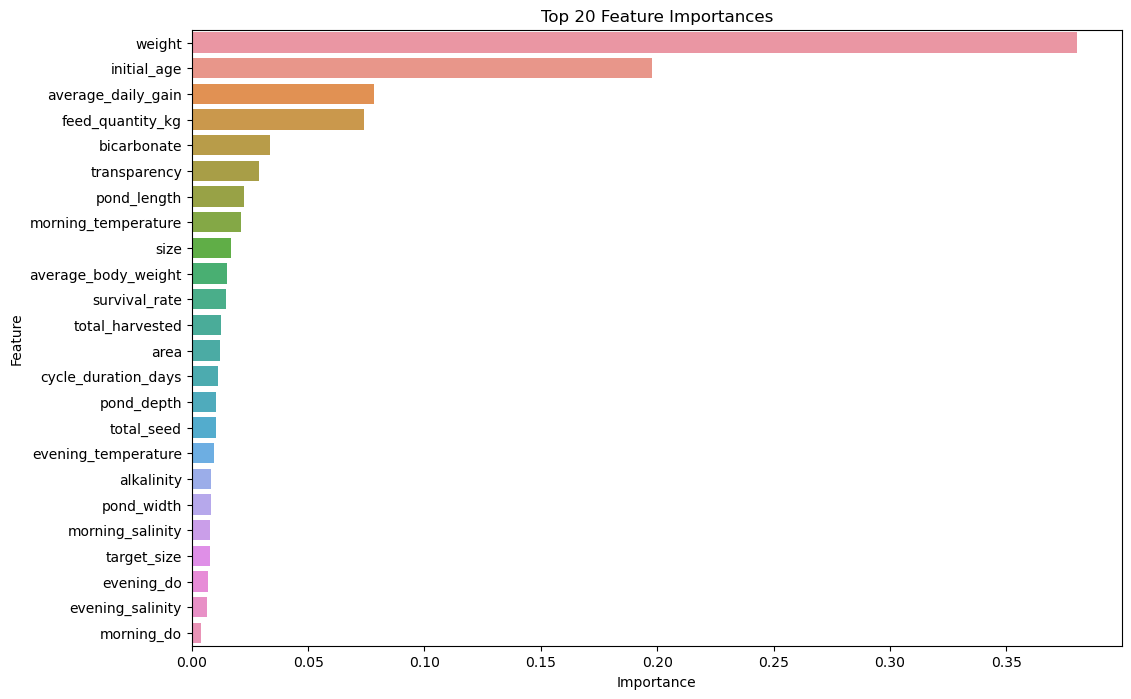

In [34]:
# Assume random_forest has been trained and selected_feature_names is available
# Get feature importance from the model
feature_importances = random_forest.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': feature_importances
})

# Sort the feature importance from most to least important
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 20 important features
top_20_feature_importance_df = feature_importance_df.head(24)
print(top_20_feature_importance_df)

# Visualize the top 20 important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_20_feature_importance_df)
plt.title('Top 20 Feature Importances')
plt.show()

In [35]:
# Using the variable feature_importances and RFE
feature_importances = top_20_feature_importance_df['Feature'].unique()
RFE = selected_feature_names

# Convert lists to sets for easier set operations
set_feature_importances = set(feature_importances)
set_RFE = set(RFE)

# Features that are in 'feature_importances' but not in 'RFE'
only_in_feature_importances = set_feature_importances - set_RFE

# Features that are in 'RFE' but not in 'feature_importances'
only_in_RFE = set_RFE - set_feature_importances

# Features that are in both sets
in_both = set_feature_importances & set_RFE

print("Features only in 'feature_importances':", only_in_feature_importances)
print("Features only in 'RFE':", only_in_RFE)
print("Features in both sets:", in_both)

Features only in 'feature_importances': set()
Features only in 'RFE': set()
Features in both sets: {'feed_quantity_kg', 'target_size', 'initial_age', 'average_body_weight', 'transparency', 'total_harvested', 'morning_temperature', 'pond_length', 'morning_do', 'area', 'total_seed', 'size', 'morning_salinity', 'evening_temperature', 'evening_salinity', 'average_daily_gain', 'evening_do', 'pond_depth', 'weight', 'cycle_duration_days', 'survival_rate', 'alkalinity', 'pond_width', 'bicarbonate'}


## Training Data

In [36]:
# Sanity Check (selected feature)
feature_importance_df.Feature.unique()

array(['weight', 'initial_age', 'average_daily_gain', 'feed_quantity_kg',
       'bicarbonate', 'transparency', 'pond_length',
       'morning_temperature', 'size', 'average_body_weight',
       'survival_rate', 'total_harvested', 'area', 'cycle_duration_days',
       'pond_depth', 'total_seed', 'evening_temperature', 'alkalinity',
       'pond_width', 'morning_salinity', 'target_size', 'evening_do',
       'evening_salinity', 'morning_do'], dtype=object)

In [37]:
# Sanity Check
X_train

total_seed     area  initial_age  limit_weight_per_area  \
130        71008   827.08          0.0                   1.25   
911       372000  2400.00          1.0                   2.00   
858       200126   803.84          0.0                   1.25   
297       326192   706.50          0.0                   2.50   
1101       84192  1000.00          0.0                   1.25   
...          ...      ...          ...                    ...   
1147       50000   256.00          0.0                   2.25   
106       235000  1300.00          1.0                   1.25   
1041      115000  1000.00          0.0                   1.20   
1122      320000  1450.00          0.0                   2.50   
1346       71008   812.00          0.0                   1.25   

      target_cultivation_day  target_size  pond_length  pond_width  \
130                    100.0         55.0        31.00       26.68   
911                    140.0         45.0        60.00       40.00   
858                    120.0         55.0        32.00       32.00   
297                     95.0         50.0        32.00       32.00   
1101                   100.0         55.0        40.00       40.00   
...                      ...          ...          ...         ...   
1147                    99.0         45.0        16.00       16.00   
106                    100.0         55.0        41.63       31.22   
1041                   110.0         30.0        37.67       28.25   
1122                   120.0         45.0        50.00       29.00   
1346                   100.0         55.0        29.00       28.00   

      pond_depth    size  ...   nitrate   nitrite  alkalinity    hardness  \
130          1.0  107.00  ...  0.000000  0.000000    0.000000    0.000000   
911          1.3   66.00  ...  0.000000  0.000000    0.000000    0.000000   
858          1.5  101.04  ...  0.000000  0.000000    0.000000    0.000000   
297          1.3  174.00  ...  3.783784  0.000000   11.972973  654.729730   
1101         1.0   92.60  ...  0.188679  0.003019  388.233208   78.339623   
...          ...     ...  ...       ...       ...         ...         ...   
1147         1.2  180.00  ...  0.000000  0.000000    0.000000    0.000000   
106          1.4  116.00  ...  0.000125  1.329732   12.946429  377.660714   
1041         1.1  110.00  ...  0.000000  0.013000   25.129630  932.907407   
1122         1.2  133.00  ...  0.000000  0.002574   17.276596  244.276596   
1346         2.1  115.00  ...  0.000000  0.000000    0.000000    0.000000   

        calcium   magnesium  carbonate  bicarbonate  transparency  \
130    0.000000    0.000000   0.000000     0.000000     49.101449   
911    0.000000    0.000000   0.000000     0.000000      0.000000   
858    0.000000    0.000000   0.000000     0.000000     42.352941   
297   43.243243  160.594595   0.000000    11.972973     35.945946   
1101  27.830189   80.415094   0.000000   373.981132     24.330189   
...         ...         ...        ...          ...           ...   
1147   0.000000    0.000000   0.000000     0.000000     35.196078   
106   84.232143  293.410714   1.732143    10.660714     52.321429   
1041  13.555556   42.018519   1.333333     3.111111     50.092593   
1122  43.680851  163.574468   1.702128    15.553191     35.063830   
1346   0.000000    0.000000   0.000000     0.000000     46.609589   

      total_plankton_  
130          0.000000  
911          0.000000  
858          0.000000  
297     405810.825676  
1101      8301.886792  
...               ...  
1147         0.000000  
106       4285.714286  
1041       740.740741  
1122     23872.340426  
1346         0.000000  

[1095 rows x 34 columns]

In [38]:
# Sanity Check
X_test

total_seed    area  initial_age  limit_weight_per_area  \
568       408825  2020.0          1.0                   2.00   
18        400000  2025.0          0.0                   1.25   
252       120000  1000.0          0.0                   1.25   
733       369096  2330.0          0.0                   1.25   
308       203000  1600.0          1.0                   1.25   
...          ...     ...          ...                    ...   
1362      380000  1056.0          0.0                   1.25   
145        80000   490.0          0.0                   1.50   
136       436424  1962.5          0.0                   1.25   
971       150000  1200.0          0.0                   1.25   
178       133000  1680.0          0.0                   1.25   

      target_cultivation_day  target_size  pond_length  pond_width  \
568                    135.0         45.0        40.00       50.50   
18                     120.0         55.0        45.00       45.00   
252                    120.0         55.0        50.00       20.00   
733                    120.0         55.0        50.00       46.60   
308                    120.0         55.0        40.00       40.00   
...                      ...          ...          ...         ...   
1362                   120.0         55.0        33.00       32.00   
145                    110.0         35.0        25.56       19.17   
136                    120.0         50.0        50.00       50.00   
971                    100.0         55.0        34.64       34.64   
178                    120.0         45.0        36.20       46.40   

      pond_depth   size  ...   nitrate    nitrite  alkalinity    hardness  \
568          1.3   95.0  ...  0.000000   0.004660   21.433962    0.000000   
18           1.5  115.0  ...  0.000000   0.000000    0.000000    0.000000   
252          1.0  179.0  ...  0.000000   0.001000    3.040000   66.000000   
733          1.2   81.0  ...  0.000000   0.000000    0.000000    0.000000   
308          1.0   63.0  ...  2.631579   0.013158    0.000000    0.000000   
...          ...    ...  ...       ...        ...         ...         ...   
1362         1.8  108.0  ...  0.000000  49.045185    9.347826  405.434783   
145          1.0  230.0  ...  0.000000   0.000000    0.000000    0.000000   
136          1.2   78.0  ...  0.000000   0.000610   21.768293    0.000000   
971          1.7   41.0  ...  0.000000   0.014970    6.878788  222.727273   
178          1.1   57.0  ...  1.442308   0.042875   12.000000  119.759615   

        calcium   magnesium  carbonate  bicarbonate  transparency  \
568    0.000000    0.000000   2.792453    18.641509     44.858491   
18     0.000000    0.000000   0.000000     0.000000     15.000000   
252   10.000000   56.000000   0.320000     2.720000      0.000000   
733    0.000000    0.000000   0.000000     0.000000      7.465909   
308    0.000000    0.000000   0.000000     0.000000      9.631579   
...         ...         ...        ...          ...           ...   
1362  29.130435   80.826087   0.000000     9.347826     39.304348   
145    0.000000    0.000000   0.000000     0.000000      0.000000   
136   67.670732  131.341463   0.000000     0.000000      9.000000   
971   33.333333  189.393939   0.545455     6.333333      0.000000   
178   74.615385  179.173077   0.557692    11.394231     45.120192   

      total_plankton_  
568       9644.339623  
18           0.000000  
252          0.000000  
733          0.000000  
308          0.000000  
...               ...  
1362      6222.826087  
145          0.000000  
136          0.000000  
971      36704.545455  
178      45533.653846  

[274 rows x 34 columns]

In [39]:
import os
import pickle
from sklearn.preprocessing import RobustScaler

# Columns to scale
columns_to_scale = [
       'weight', 'initial_age', 'average_daily_gain', 'feed_quantity_kg',
       'bicarbonate', 'transparency', 'pond_length',
       'morning_temperature', 'size', 'average_body_weight',
       'survival_rate', 'total_harvested', 'area', 'cycle_duration_days',
       'pond_depth', 'total_seed', 'evening_temperature', 'alkalinity',
       'pond_width', 'morning_salinity', 'target_size', 'evening_do',
       'evening_salinity', 'morning_do'
]

def fit_scaler(train_data):
    """
    Fit a RobustScaler to the training data.

    Parameters:
    train_data (DataFrame): The training data.

    Returns:
    scaler (RobustScaler): The fitted scaler object.
    """
    scaler = RobustScaler()
    scaler.fit(train_data.loc[:, columns_to_scale])
    # Save scaler
    with open('model/selling_price_scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    return scaler

def load_scaler(folder_path):
    """
    Load a saved scaler object from a folder.

    Parameters:
    folder_path (str): The path to the folder containing the saved scaler.

    Returns:
    scaler (RobustScaler): The loaded scaler object.
    """
    # Load scaler
    file_path = os.path.join(folder_path, 'selling_price_scaler.pkl')
    with open(file_path, 'rb') as f:
        scaler = pickle.load(f)
    return scaler

def transform_data(data, scaler):
    """
    Scale the data using a given scaler.

    Parameters:
    data (DataFrame): The data to be scaled.
    scaler (RobustScaler): The scaler object to use for scaling.

    Returns:
    scaled_data (DataFrame): The scaled data.
    """
    scaled_data = scaler.transform(data.loc[:, columns_to_scale])
    data.loc[:, columns_to_scale] = scaled_data
    return data

In [40]:
X_train_feature_importances = X_train[[
       'weight', 'initial_age', 'average_daily_gain', 'feed_quantity_kg',
       'bicarbonate', 'transparency', 'pond_length',
       'morning_temperature', 'size', 'average_body_weight',
       'survival_rate', 'total_harvested', 'area', 'cycle_duration_days',
       'pond_depth', 'total_seed', 'evening_temperature', 'alkalinity',
       'pond_width', 'morning_salinity', 'target_size', 'evening_do',
       'evening_salinity', 'morning_do'
]].copy()
X_test_feature_importances = X_test[[
       'weight', 'initial_age', 'average_daily_gain', 'feed_quantity_kg',
       'bicarbonate', 'transparency', 'pond_length',
       'morning_temperature', 'size', 'average_body_weight',
       'survival_rate', 'total_harvested', 'area', 'cycle_duration_days',
       'pond_depth', 'total_seed', 'evening_temperature', 'alkalinity',
       'pond_width', 'morning_salinity', 'target_size', 'evening_do',
       'evening_salinity', 'morning_do'
]].copy()

In [41]:
# Sorted Columns
X_train_feature_importances = X_train_feature_importances[sorted(X_train_feature_importances.columns)]

In [42]:
# Sorted Columns
X_test_feature_importances = X_test_feature_importances[sorted(X_test_feature_importances.columns)]

In [43]:
# Fit a RobustScaler to the training data
scaler = fit_scaler(X_train_feature_importances)

In [44]:
# Load the scaler from the specified folder path
scaling = load_scaler('model/')

In [45]:
# Transform the training and testing data using the loaded scaler
X_train_clean = transform_data(X_train_feature_importances, scaling)
X_test_clean = transform_data(X_test_feature_importances, scaling)

In [46]:
X_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 130 to 1346
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alkalinity           1095 non-null   float64
 1   area                 1095 non-null   float64
 2   average_body_weight  1095 non-null   float64
 3   average_daily_gain   1095 non-null   float64
 4   bicarbonate          1095 non-null   float64
 5   cycle_duration_days  1095 non-null   float64
 6   evening_do           1095 non-null   float64
 7   evening_salinity     1095 non-null   float64
 8   evening_temperature  1095 non-null   float64
 9   feed_quantity_kg     1095 non-null   float64
 10  initial_age          1095 non-null   float64
 11  morning_do           1095 non-null   float64
 12  morning_salinity     1095 non-null   float64
 13  morning_temperature  1095 non-null   float64
 14  pond_depth           1095 non-null   float64
 15  pond_length          1095 non-null  

## Baseline

In [47]:
# Baseline
y_baseline_predict = y_train.mean()
y_baseline_predict

33345373.919977825

In [48]:
# Viewing Mean Absolute Error for the baseline Model
mae_train_baseline = mean_absolute_error(y_train, y_baseline_predict * np.ones(len(y_train)))
mae_test_baseline = mean_absolute_error(y_test, y_baseline_predict * np.ones(len(y_test)))

# Viewing mae train baseline and mae test baseline
mae_train_baseline, mae_test_baseline

(32056119.139981106, 32191213.33355583)

## Linear Regression

In [49]:
# Build LinearRegression
lin_reg = LinearRegression()

In [50]:
#Fitting Model LinearRegression
lin_reg.fit(X_train_clean, y_train)

LinearRegression()

In [51]:
# Predict
y_pred_train = lin_reg.predict(X_train_clean)
y_pred_test = lin_reg.predict(X_test_clean)

# MAE
mae_train_lg = mean_absolute_error(y_train, y_pred_train)
mae_test_lg = mean_absolute_error(y_test, y_pred_test)

# Viewing the results of mae train lg and mae test lg
mae_train_lg, mae_test_lg

(23699670.871598512, 29844174.58840581)

## Dectree

In [52]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Initialize the DecisionTreeRegressor model with specified parameters
dec_tree = DecisionTreeRegressor(max_depth=10, random_state=123)

# Train the model on the training data
dec_tree.fit(X_train_clean, y_train)

# Make predictions on the training data
y_pred_train = dec_tree.predict(X_train_clean)

# Make predictions on the test data
y_pred_test = dec_tree.predict(X_test_clean)

# Calculate the Mean Absolute Error (MAE) for the training and test data
mae_train_dt = mean_absolute_error(y_train, y_pred_train)
mae_test_dt = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results
print(f"MAE Train : {mae_train_dt:.4f}")
print(f"MAE Test  : {mae_test_dt:.4f}")

MAE Train : 5042564.4903
MAE Test  : 18711272.7492


In [53]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Parameter grid for key parameters of DecisionTreeRegressor
params = {
    "max_depth": [3, 5, 7, 9, 11],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 5, 10]
}

# Initialize the DecisionTreeRegressor model
dec_tree = DecisionTreeRegressor(random_state=123)

# Initialize GridSearchCV
dec_tree_cv = GridSearchCV(estimator=dec_tree,
                           param_grid=params,
                           cv=7,
                           scoring="neg_mean_absolute_error")

# Train GridSearchCV
dec_tree_cv.fit(X_train_clean, y_train)

# Get the best parameters
best_params = dec_tree_cv.best_params_

# Train the model with the best parameters
best_dec_tree = DecisionTreeRegressor(max_depth=best_params["max_depth"],
                                      min_samples_split=best_params["min_samples_split"],
                                      min_samples_leaf=best_params["min_samples_leaf"],
                                      random_state=123)

best_dec_tree.fit(X_train_clean, y_train)

# Make predictions on the training and test data
y_pred_train = best_dec_tree.predict(X_train_clean)
y_pred_test = best_dec_tree.predict(X_test_clean)

# Calculate Mean Absolute Error (MAE) for training and test data
mae_train_dt_cv = mean_absolute_error(y_train, y_pred_train)
mae_test_dt_cv = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results and best parameters
print(f"MAE Train : {mae_train_dt_cv:.4f}")
print(f"MAE Test  : {mae_test_dt_cv:.4f}")
print(f"Best Parameters: {best_params}")

MAE Train : 7923833.0544
MAE Test  : 19823967.5255
Best Parameters: {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 10}


## RandomForest

In [54]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Initialize the RandomForestRegressor model with specified parameters
random_forest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=123)

# Train the model on the training data
random_forest.fit(X_train_clean, y_train)

# Make predictions on the training data
y_pred_train = random_forest.predict(X_train_clean)

# Make predictions on the test data
y_pred_test = random_forest.predict(X_test_clean)

# Calculate Mean Absolute Error (MAE) for training and test data
mae_train_rf = mean_absolute_error(y_train, y_pred_train)
mae_test_rf = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results
print(f"MAE Train : {mae_train_rf:.4f}")
print(f"MAE Test  : {mae_test_rf:.4f}")

MAE Train : 7614823.3629
MAE Test  : 15234763.8092


In [55]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

# Parameter grid for RandomForestRegressor
params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7, 9, 11],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 5, 10]
}

# Initialize RandomForestRegressor model
random_forest = RandomForestRegressor(random_state=123)

# Initialize RandomizedSearchCV
rf_cv = RandomizedSearchCV(estimator=random_forest,
                           param_distributions=params,
                           n_iter=50,
                           cv=7,
                           scoring="neg_mean_absolute_error",
                           random_state=123,
                           n_jobs=-1)

# Train RandomizedSearchCV
rf_cv.fit(X_train_clean, y_train)

# Get the best parameters
best_params = rf_cv.best_params_

# Train the model with the best parameters
best_rf = RandomForestRegressor(n_estimators=best_params["n_estimators"],
                                max_depth=best_params["max_depth"],
                                min_samples_split=best_params["min_samples_split"],
                                min_samples_leaf=best_params["min_samples_leaf"],
                                random_state=123)

best_rf.fit(X_train_clean, y_train)

# Make predictions on the training and test data
y_pred_train = best_rf.predict(X_train_clean)
y_pred_test = best_rf.predict(X_test_clean)

# Calculate Mean Absolute Error (MAE) for training and test data
mae_train_rf_cv = mean_absolute_error(y_train, y_pred_train)
mae_test_rf_cv = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results and best parameters
print(f"MAE Train : {mae_train_rf_cv:.4f}")
print(f"MAE Test  : {mae_test_rf_cv:.4f}")
print(f"Best Parameters: {best_params}")

MAE Train : 10421390.4859
MAE Test  : 14830530.2043
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 11}


## Adaboost

In [56]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error

# Initialize AdaBoostRegressor model with specified parameters
adaboost = AdaBoostRegressor(n_estimators=100, random_state=123)

# Train the model on the training data
adaboost.fit(X_train_clean, y_train)

# Make predictions on the training data
y_pred_train = adaboost.predict(X_train_clean)

# Make predictions on the test data
y_pred_test = adaboost.predict(X_test_clean)

# Calculate Mean Absolute Error (MAE) for training and test data
mae_train_ab = mean_absolute_error(y_train, y_pred_train)
mae_test_ab = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results
print(f"MAE Train : {mae_train_ab:.4f}")
print(f"MAE Test  : {mae_test_ab:.4f}")


MAE Train : 20326827.0336
MAE Test  : 22835326.6931


In [57]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Parameter grid for some key parameters of AdaBoostRegressor
params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1.0]
}

# Initialize AdaBoostRegressor model
adaboost = AdaBoostRegressor(random_state=123)

# Initialize GridSearchCV
ab_cv = GridSearchCV(estimator=adaboost,
                     param_grid=params,
                     cv=7,
                     scoring="neg_mean_absolute_error")

# Train GridSearchCV
ab_cv.fit(X_train_clean, y_train)

# Get the best parameters
best_params = ab_cv.best_params_

# Train the model with the best parameters
best_ab = AdaBoostRegressor(n_estimators=best_params["n_estimators"],
                            learning_rate=best_params["learning_rate"],
                            random_state=123)

best_ab.fit(X_train_clean, y_train)

# Make predictions on the training and test data
y_pred_train = best_ab.predict(X_train_clean)
y_pred_test = best_ab.predict(X_test_clean)

# Calculate Mean Absolute Error (MAE) for training and test data
mae_train_ab_cv = mean_absolute_error(y_train, y_pred_train)
mae_test_ab_cv = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results and best parameters
print(f"MAE Train : {mae_train_ab_cv:.4f}")
print(f"MAE Test  : {mae_test_ab_cv:.4f}")
print(f"Best Parameters: {best_params}")

MAE Train : 18338449.8337
MAE Test  : 20818976.2037
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}


## Gradient Boosting

In [58]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Initialize the GradientBoostingRegressor model with specified parameters
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=123)

# Train the model on the training data
gradient_boosting.fit(X_train_clean, y_train)

# Make predictions on the training data
y_pred_train = gradient_boosting.predict(X_train_clean)

# Make predictions on the test data
y_pred_test = gradient_boosting.predict(X_test_clean)

# Calculate the Mean Absolute Error (MAE) for the training and test data
mae_train_gb = mean_absolute_error(y_train, y_pred_train)
mae_test_gb = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results
print(f"MAE Train : {mae_train_gb:.4f}")
print(f"MAE Test  : {mae_test_gb:.4f}")


MAE Train : 8768363.7243
MAE Test  : 15638166.9480


In [59]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Parameter grid for key parameters of GradientBoostingRegressor
params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1.0],
    "max_depth": [3, 5, 7, 9]
}

# Initialize the GradientBoostingRegressor model
gradient_boosting = GradientBoostingRegressor(random_state=123)

# Initialize GridSearchCV
gb_cv = GridSearchCV(estimator=gradient_boosting,
                     param_grid=params,
                     cv=7,
                     scoring="neg_mean_absolute_error")

# Train the GridSearchCV
gb_cv.fit(X_train_clean, y_train)

# Get the best parameters
best_params = gb_cv.best_params_

# Train the model with the best parameters
best_gb = GradientBoostingRegressor(n_estimators=best_params["n_estimators"],
                                    learning_rate=best_params["learning_rate"],
                                    max_depth=best_params["max_depth"],
                                    random_state=123)

best_gb.fit(X_train_clean, y_train)

# Make predictions on the training and test data
y_pred_train = best_gb.predict(X_train_clean)
y_pred_test = best_gb.predict(X_test_clean)

# Calculate Mean Absolute Error (MAE) for training and test data
mae_train_gb_cv = mean_absolute_error(y_train, y_pred_train)
mae_test_gb_cv = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results and the best parameters
print(f"MAE Train : {mae_train_gb_cv:.4f}")
print(f"MAE Test  : {mae_test_gb_cv:.4f}")
print(f"Best Parameters: {best_params}")

MAE Train : 444340.5920
MAE Test  : 14587165.8254
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


## Xgboost

In [60]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Initialize the XGBoost model with specified parameters
xgboost = xgb.XGBRegressor(n_estimators=100, random_state=123)

# Train the model on the training data
xgboost.fit(X_train_clean, y_train)

# Make predictions on the training data
y_pred_train = xgboost.predict(X_train_clean)

# Make predictions on the test data
y_pred_test = xgboost.predict(X_test_clean)

# Calculate Mean Absolute Error (MAE) for the training and test data
mae_train_xgb = mean_absolute_error(y_train, y_pred_train)
mae_test_xgb = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results
print(f"MAE Train : {mae_train_xgb:.4f}")
print(f"MAE Test  : {mae_test_xgb:.4f}")


MAE Train : 565780.9393
MAE Test  : 12798469.8897


In [61]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from scipy.stats import uniform, randint

# Define distributions for key XGBoost parameters
param_distributions = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.1),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.3),
    'reg_alpha': uniform(0, 0.5),
    'reg_lambda': uniform(1, 2)
}

# Initialize the XGBoost model
xgboost = xgb.XGBRegressor(random_state=123)

# Initialize RandomizedSearchCV
xgb_random_cv = RandomizedSearchCV(estimator=xgboost,
                                   param_distributions=param_distributions,
                                   n_iter=50,
                                   cv=7,
                                   scoring="neg_mean_absolute_error",
                                   random_state=123,
                                   n_jobs=-1,
                                   verbose=2)

# Train the RandomizedSearchCV
xgb_random_cv.fit(X_train_clean, y_train)

# Get the best parameters
best_params = xgb_random_cv.best_params_

# Train the model with the best parameters
best_xgb = xgb.XGBRegressor(**best_params, random_state=123)
best_xgb.fit(X_train_clean, y_train)

# Make predictions on the training and test data
y_pred_train = best_xgb.predict(X_train_clean)
y_pred_test = best_xgb.predict(X_test_clean)

# Calculate Mean Absolute Error (MAE) for training and test data
mae_train_xgb_random_cv = mean_absolute_error(y_train, y_pred_train)
mae_test_xgb_random_cv = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results and the best parameters
print(f"MAE Train : {mae_train_xgb_random_cv:.4f}")
print(f"MAE Test  : {mae_test_xgb_random_cv:.4f}")
print(f"Best Parameters: {best_params}")


Fitting 7 folds for each of 50 candidates, totalling 350 fits
MAE Train : 2154754.2783
MAE Test  : 12857519.5324
Best Parameters: {'colsample_bytree': 0.7354683383657307, 'gamma': 0.16571102258822193, 'learning_rate': 0.0678551468108833, 'max_depth': 8, 'n_estimators': 147, 'reg_alpha': 0.001344032287160346, 'reg_lambda': 2.97669083856564, 'subsample': 0.9621366302646439}


## Lightgbm

In [62]:
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

# Initialize the LightGBM model with specified parameters
lightgbm = lgb.LGBMRegressor(n_estimators=100, random_state=123)

# Train the model on the training data
lightgbm.fit(X_train_clean, y_train)

# Make predictions on the training data
y_pred_train = lightgbm.predict(X_train_clean)

# Make predictions on the test data
y_pred_test = lightgbm.predict(X_test_clean)

# Calculate Mean Absolute Error (MAE) for the training and test data
mae_train_lgb = mean_absolute_error(y_train, y_pred_train)
mae_test_lgb = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results
print(f"MAE Train : {mae_train_lgb:.4f}")
print(f"MAE Test  : {mae_test_lgb:.4f}")

C:\Users\hp\anaconda3\lib\site-packages\dask\dataframe\_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000881 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4720
[LightGBM] [Info] Number of data points in the train set: 1095, number of used features: 24
[LightGBM] [Info] Start training from score 33345373.915774
MAE Train : 7191031.2446
MAE Test  : 16297437.8377


In [63]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Parameter grid for key LightGBM parameters
params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1.0],
    "max_depth": [3, 5, 7, 9]
}

# Initialize the LightGBM model
lightgbm = lgb.LGBMRegressor(random_state=123)

# Initialize GridSearchCV
lgb_cv = GridSearchCV(estimator=lightgbm,
                      param_grid=params,
                      cv=7,
                      scoring="neg_mean_absolute_error")

# Train the GridSearchCV
lgb_cv.fit(X_train_clean, y_train)

# Get the best parameters
best_params = lgb_cv.best_params_

# Train the model with the best parameters
best_lgb = lgb.LGBMRegressor(n_estimators=best_params["n_estimators"],
                             learning_rate=best_params["learning_rate"],
                             max_depth=best_params["max_depth"],
                             random_state=123)

best_lgb.fit(X_train_clean, y_train)

# Make predictions on the training and test data
y_pred_train = best_lgb.predict(X_train_clean)
y_pred_test = best_lgb.predict(X_test_clean)

# Calculate Mean Absolute Error (MAE) for the training and test data
mae_train_lgb_cv = mean_absolute_error(y_train, y_pred_train)
mae_test_lgb_cv = mean_absolute_error(y_test, y_pred_test)

# Print the MAE results and the best parameters
print(f"MAE Train : {mae_train_lgb_cv:.4f}")
print(f"MAE Test  : {mae_test_lgb_cv:.4f}")
print(f"Best Parameters: {best_params}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000646 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4586
[LightGBM] [Info] Number of data points in the train set: 938, number of used features: 24
[LightGBM] [Info] Start training from score 33622981.127706
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

## Simple Deep Leaning

Epoch 1/500
14/14 [==============================] - 3s 76ms/step - loss: 34259292.0000 - mean_absolute_error: 34259292.0000 - val_loss: 29689690.0000 - val_mean_absolute_error: 29689690.0000
Epoch 2/500
14/14 [==============================] - 0s 12ms/step - loss: 34259284.0000 - mean_absolute_error: 34259284.0000 - val_loss: 29689686.0000 - val_mean_absolute_error: 29689686.0000
Epoch 3/500
14/14 [==============================] - 0s 11ms/step - loss: 34259272.0000 - mean_absolute_error: 34259272.0000 - val_loss: 29689664.0000 - val_mean_absolute_error: 29689664.0000
Epoch 4/500
14/14 [==============================] - 0s 10ms/step - loss: 34259236.0000 - mean_absolute_error: 34259236.0000 - val_loss: 29689626.0000 - val_mean_absolute_error: 29689626.0000
Epoch 5/500
14/14 [==============================] - 0s 12ms/step - loss: 34259168.0000 - mean_absolute_error: 34259168.0000 - val_loss: 29689548.0000 - val_mean_absolute_error: 29689548.0000
Epoch 6/500
14/14 [=====================

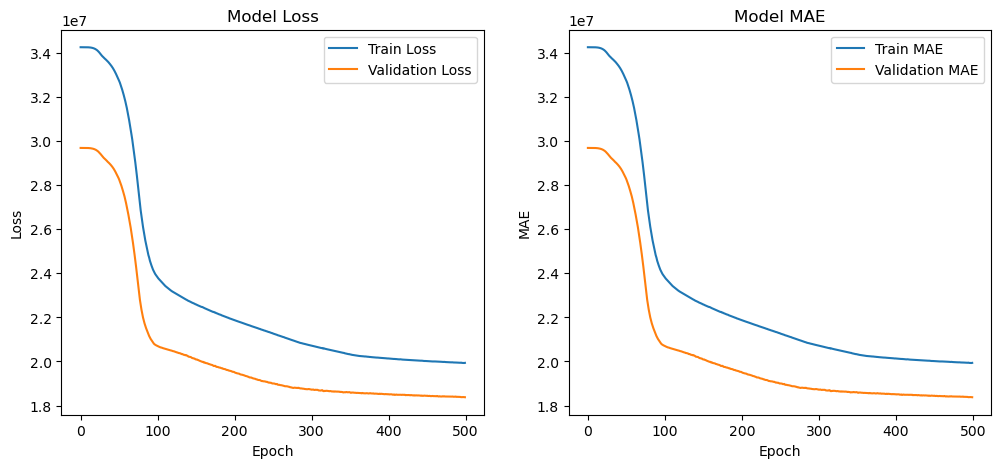

In [64]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.metrics import MeanAbsoluteError as MAE
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(123)
tf.random.set_seed(123)

# Determine input dimension
input_dim = X_train_clean.shape[1]

# Build the model
model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='relu'))  # First hidden layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(32, activation='relu'))  # Third hidden layer
model.add(Dense(1))  # Output layer

# Compile the model with specified learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanAbsoluteError(), metrics=[MAE()])

# Train the model with specified number of epochs
history = model.fit(X_train_clean, y_train, epochs=500, batch_size=64, validation_split=0.2, verbose=1)

# Make predictions on the training and test data
y_pred_train = model.predict(X_train_clean)
y_pred_test = model.predict(X_test_clean)

# Flatten the predictions
y_pred_train_flat = y_pred_train.flatten()
y_pred_test_flat = y_pred_test.flatten()

# Calculate Mean Absolute Error (MAE) for the training and test data
mae_train_dl = np.mean(np.abs(y_train - y_pred_train_flat))
mae_test_dl = np.mean(np.abs(y_test - y_pred_test_flat))

# Print the MAE results
print(f"MAE Train : {mae_train_dl:.4f}")
print(f"MAE Test  : {mae_test_dl:.4f}")

# Visualize model performance over epochs
# Plot loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [65]:
# Define MAE values for training and test sets from the models created
mae_train = [
    mae_train_baseline, mae_train_lg, mae_train_dt, mae_train_dt_cv, 
    mae_train_rf, mae_train_rf_cv, mae_train_ab, mae_train_ab_cv, 
    mae_train_gb, mae_train_gb_cv, mae_train_xgb, mae_train_xgb_random_cv, 
    mae_train_lgb, mae_train_lgb_cv, mae_train_dl
]

mae_test = [
    mae_test_baseline, mae_test_lg, mae_test_dt, mae_test_dt_cv, 
    mae_test_rf, mae_test_rf_cv, mae_test_ab, mae_test_ab_cv, 
    mae_test_gb, mae_test_gb_cv, mae_test_xgb, mae_test_xgb_random_cv, 
    mae_test_lgb, mae_test_lgb_cv, mae_test_dl
]

# Define indexes for the summary DataFrame
indexes = [
    'baseline', 'linear regression', 'Decision Tree', 'Decision Tree CV', 
    'Random Forest', 'Random Forest CV', 'AdaBoost', 'AdaBoost CV', 
    'Gradient Boosting', 'Gradient Boosting CV', 'XGBoost', 'XGBoost CV', 
    'LightGBM', 'LightGBM CV', 'Simple Neural Network'
]

# Create a summary DataFrame with MAE values for training and test sets
summary_df = pd.DataFrame({
    "MAE Train": mae_train,
    "MAE Test": mae_test
}, index=indexes)

# Display the summary DataFrame
summary_df


MAE Train      MAE Test
baseline               3.205612e+07  3.219121e+07
linear regression      2.369967e+07  2.984417e+07
Decision Tree          5.042564e+06  1.871127e+07
Decision Tree CV       7.923833e+06  1.982397e+07
Random Forest          7.614823e+06  1.523476e+07
Random Forest CV       1.042139e+07  1.483053e+07
AdaBoost               2.032683e+07  2.283533e+07
AdaBoost CV            1.833845e+07  2.081898e+07
Gradient Boosting      8.768364e+06  1.563817e+07
Gradient Boosting CV   4.443406e+05  1.458717e+07
XGBoost                5.657809e+05  1.279847e+07
XGBoost CV             2.154754e+06  1.285752e+07
LightGBM               7.191031e+06  1.629744e+07
LightGBM CV            6.741331e+06  1.696633e+07
Simple Neural Network  1.961737e+07  2.421120e+07

In [66]:
# Sorted by MAE Test (Ascending)
summary_df.sort_values(by='MAE Test')

MAE Train      MAE Test
XGBoost                5.657809e+05  1.279847e+07
XGBoost CV             2.154754e+06  1.285752e+07
Gradient Boosting CV   4.443406e+05  1.458717e+07
Random Forest CV       1.042139e+07  1.483053e+07
Random Forest          7.614823e+06  1.523476e+07
Gradient Boosting      8.768364e+06  1.563817e+07
LightGBM               7.191031e+06  1.629744e+07
LightGBM CV            6.741331e+06  1.696633e+07
Decision Tree          5.042564e+06  1.871127e+07
Decision Tree CV       7.923833e+06  1.982397e+07
AdaBoost CV            1.833845e+07  2.081898e+07
AdaBoost               2.032683e+07  2.283533e+07
Simple Neural Network  1.961737e+07  2.421120e+07
linear regression      2.369967e+07  2.984417e+07
baseline               3.205612e+07  3.219121e+07

## Error Analysis

In [67]:
y_pred_test_best_rf = best_rf.predict(X_test_clean)

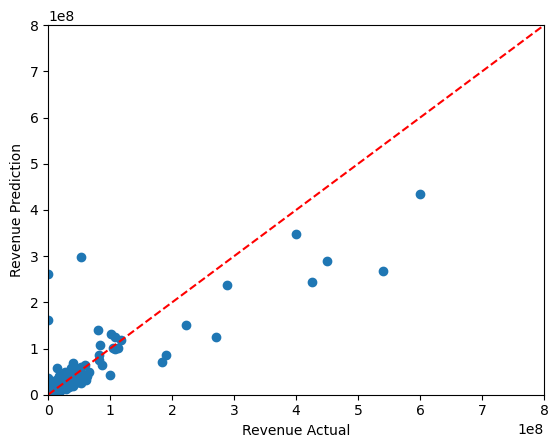

In [68]:
#Scatter plot data faktual dan data prediksi
plt.scatter(y_test, y_pred_test_best_rf)
plt.plot([0, 800000000], [0,800000000], "--r")

plt.xlabel("Revenue Actual")
plt.ylabel("Revenue Prediction")
plt.xlim(0, 800000000)
plt.ylim(0, 800000000)
#plt.savefig("predict.png")
plt.show()

## Save Best Model

In [69]:
import pickle

# Define the file path where the model will be saved
best_rf_cv = 'model/best_model_rf_revenue.pkl'

# Open the file in write-binary mode and save the best XGBoost model
with open(best_rf_cv, 'wb') as file:
    pickle.dump(best_rf, file)

## Load Model

In [ ]:
import pickle

# Load the XGBoost model from the file
with open("model/best_model_rf_revenue.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions on the test data
y_pred_loaded_model = loaded_model.predict(X_test_clean)